ERROR! Session/line number was not unique in database. History logging moved to new session 26


<IPython.core.display.Javascript object>


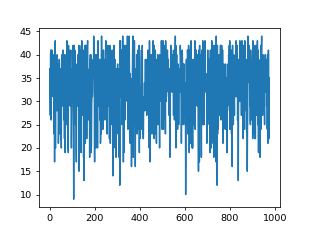

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



(976, 6)
Traceback (most recent call last):
  File "/home/smsung/anaconda3/envs/dl/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-238ff455919f>", line 63, in <module>
    from tensorflow.keras import layers
  File "/home/smsung/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/__init__.py", line 50, in __getattr__
    module = self._load()
  File "/home/smsung/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/__init__.py", line 44, in _load
    module = _importlib.import_module(self.__name__)
  File "/home/smsung/anaconda3/envs/dl/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "/home/smsung/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow_core/__init__.py", line 45, in <module>
    from . _api.v2 import compat
  File "/home/smsung/anaconda3/envs/dl/lib/python3.

In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# 정규화 함수 
def MinMaxScaler(data):
    denom = np.max(data,0)-np.min(data,0)
    nume = data-np.min(data,0)
    return nume/denom

# 정규화 되돌리기 함수 
def back_MinMax(data,value):
    diff = np.max(data,0)-np.min(data,0)
    back = value * diff + np.min(data,0)
    return back 

# 데이터 불러오기 
path = "/home/smsung/Downloads/DL_folder/"
xy = np.loadtxt(path+"100.csv", delimiter=",", skiprows=0+1+1)
xy = xy[::-1] # 역순으로 저장 

%matplotlib notebook
plt.plot(xy[:,4]) # 전체 종가
print(xy.shape)

seqLength = 7 # window size 
dataDim = 6 # 시가, 고가, 저가, 거래량 , 종가
hiddenDim = 10 
outputDim = 6
lr = 0.01
iterations = 500

trainSize = int(len(xy)*0.7)
trainSet = xy[0:trainSize]
testSet = xy[trainSize-seqLength:]

trainSet = MinMaxScaler(trainSet)
testSet = MinMaxScaler(testSet)


# 7일간의 5가지 데이터(시가, 종가, 고가, 저가, 거래량)를 받아와서 
# 바로 다음 날의 종가를 예측하는 모델로 구성

def buildDataSet(timeSeries, seqLength):
    xdata = []
    ydata = [] 
    for i in range(0, len(timeSeries)-seqLength):
        tx = timeSeries[i:i+seqLength,:-1]
        ty = timeSeries[i+seqLength,[-1]]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)
    
trainX, trainY=buildDataSet(trainSet, seqLength)
testX, testY=buildDataSet(testSet, seqLength)

# 모델 구성 

# First, let's define a RNN Cell, as a layer subclass.
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

model.add(layers.SimpleRNN(units=10, 
                           activation='tanh',
                           input_shape=[7,5]))

model.add(layers.Dense(1))

model.summary()

# 모델 학습과정 설정 
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 모델 트레이닝 
hist = model.fit(trainX, trainY, epochs=10, batch_size=16)

# 모델 테스트 
res = model.evaluate(testX, testY, batch_size=16)
print("loss",res[0],"mae",res[1])

#7 모델 사용
xhat = testX
yhat = model.predict(xhat)
print(testY)
print(yhat)

print("Evaluate : {}".format(np.average((yhat - testY)**2)))
# 원래 값으로 되돌리기 
predict1 = back_MinMax(xy[trainSize-seqLength:,[-1]],yhat)
actual = back_MinMax(xy[trainSize-seqLength:,[-1]],testY)
print("예측값",predict1)
print("실제값",actual)

print(predict1.shape)
print(actual.shape)

%matplotlib notebook
plt.figure()
plt.plot(predict1[:30], label = "predict_RNN")
plt.plot(actual[:30],label = "actual")

plt.legend(prop={'size': 20})

model2 = keras.Sequential()

model2.add(layers.LSTM(units=10, 
                           activation='tanh',
                           input_shape=[7,4]))

model2.add(layers.Dense(1))

model2.summary()

# 모델 학습과정 설정 
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 모델 트레이닝 
hist = model2.fit(trainX, trainY, epochs=10, batch_size=16)

# 모델 테스트 
res2 = model2.evaluate(testX, testY, batch_size=16)
print("loss",res2[0],"mae",res2[1])

#7 모델 사용
xhat = testX
yhat = model2.predict(xhat)
#print(testY)
#print(yhat)

#print("Evaluate : {}".format(np.average((yhat - testY)**2)))
# 원래 값으로 되돌리기 
predict2 = back_MinMax(xy[trainSize-seqLength:,[-1]],yhat)
actual = back_MinMax(xy[trainSize-seqLength:,[-1]],testY)
print("예측값",predict2)
print("실제값",actual)
%matplotlib notebook
plt.figure()
plt.plot(predict2[:30], label = "predict_LSTM")
plt.plot(actual[:30],label = "actual")

plt.legend(prop={'size': 20})

%matplotlib notebook
plt.figure()
day=30
plt.plot(predict1[:day], label = "RNN")
plt.plot(predict2[:day], label = "LSTM")
plt.plot(actual[:day],label = "actual")
print("Lotto number in this week", )
plt.legend(prop={'size': 20})